In [ ]:
import numpy as np
import analysis
ans = analysis.analysis(r"C:\\Users\\KNAG01\\Dropbox (Cambridge CARES)\\IRP3 CAPRICORN shared folder\\KNAGARAJAN\\CoolingSingapore\\DUCT_Results\\",
                        boundary_file="sg_map.geojson")

Minimum temperature =  26.64325
Maximum temperature =  30.763184


c:\Users\KNAG01\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Figure size 640x480 with 0 Axes>

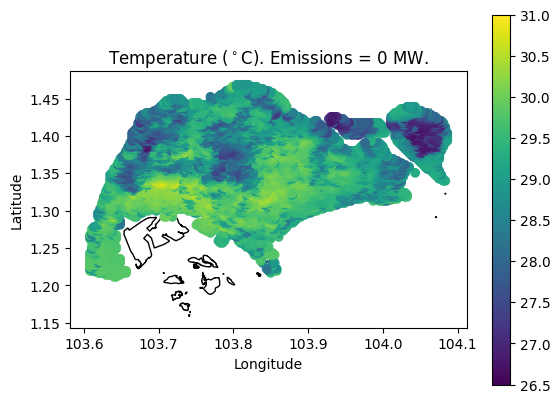

In [11]:
# Plot temperature distribution in Singapore mainland (SM) excluding Jurong Island (JI)
ji_bounds = [103.652229,1.219562,103.741493,1.291130] # JI
ex_bounds = [103.7,1.15,103.82, 1.24]
data_bounds = [103,1.0,105,2.0]
# data_bounds = [103.65, 1.22, 103.80, 1.36] # JI and SM
fig = ans.plot_temp_spatial(run = 36, hour = 0, data_bounds=data_bounds,exclude_bounds=[ji_bounds, ex_bounds],
                            vmin=26.5,vmax=31, param = "Temperature", title= "Emissions = 0 MW.")


Minimum temperature =  28.431396
Maximum temperature =  32.463867


c:\Users\KNAG01\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Figure size 640x480 with 0 Axes>

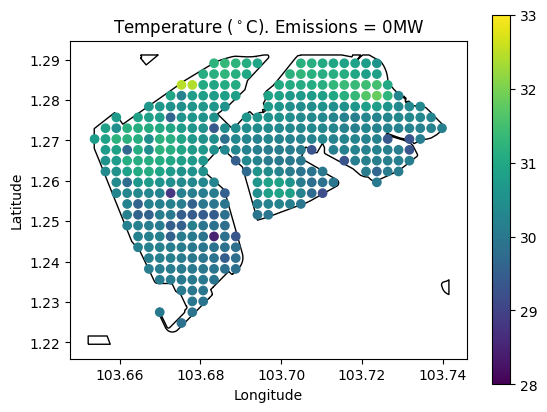

In [66]:
# Plot temperature distribution in JI. Set vmin and vmax to None if the min and max temperatures are unknown.
ji_bounds = [103.652229,1.219562,103.741493,1.291130] # JI
fig = ans.plot_temp_spatial(run = 36, hour = 20, data_bounds=ji_bounds,exclude_bounds=[],
                            vmin=28,vmax=33, param = "Temperature", title= "Emissions = 0MW")


c:\Users\KNAG01\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Figure size 640x480 with 0 Axes>

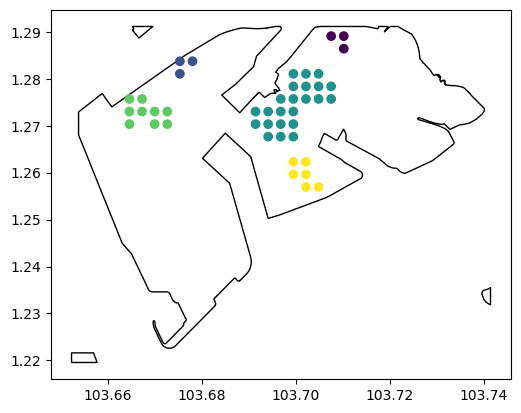

In [9]:
# Plot clusters of grid cells predicted to have high temperature within Jurong Island.

ji_bounds = [103.652229,1.219562,103.741493,1.291130] # JI

fig = ans.plot_clusters(run = 37, hour = 12, data_bounds = ji_bounds, min_temperature= 34.0, eps = 300)

0 0.025331497192382812
0 0.10601425170898438
2 0.09241294860839844
0 0.11943435668945312
0 0.20266342163085938
0 0.21622276306152344
0 0.2915630340576172
0 0.2983245849609375
0 0.3522834777832031


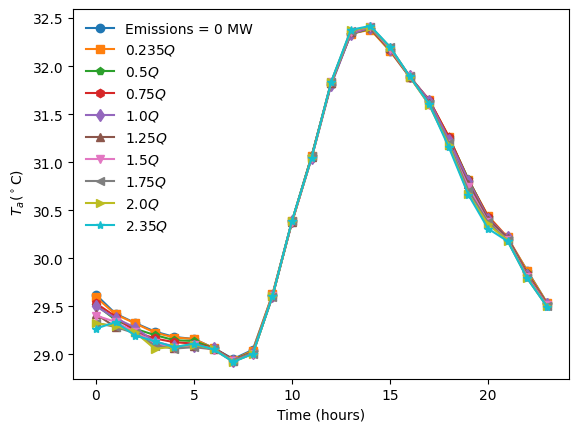

In [2]:
#Plot average temperature within SM for varying emissions
data_bounds = [103.6, 1.17, 103.85, 1.35] # Old values
data_bounds = [103.6, 1.17, 103.85, 1.31] # New values
ji_bounds = [103.652229,1.219562,103.741493,1.291130] # JI
ex_bounds = [103.7,1.15,103.82, 1.24]
frac = np.arange(0.5,2.25,0.25)
frac = np.insert(frac,0,0.235)
frac = np.append(frac,2.35)
zero_label = ["Emissions = 0 MW"]
nz_labels = [str(x) + "$Q$" for x in frac]
legend_labels= zero_label + nz_labels


# legend_labels = ["Emissions = 0 MW", "3,665", "15,595 (baseline)", "36,648"]

fig = ans.plot_ave_temp_runs(runs = [36, 40, 54, 55, 37, *range(56,60), 41], times = [*range(24)], data_bounds= data_bounds, 
                             exclude_bounds=[ji_bounds,ex_bounds],
                             legend_labels=legend_labels,
                             param = "Temperature")

6 0.34222412109375
6 0.5153579711914062
6 0.6303672790527344
20 0.73272705078125
6 0.8271656036376953
19 0.9207267761230469
19 1.0012836456298828
19 1.0738239288330078
19 1.1604061126708984


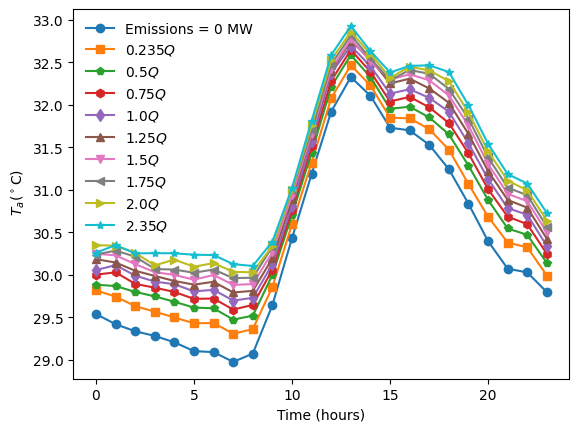

In [3]:
#Plot average temperature within JI for varying emissions
data_bounds = [103.6, 1.17, 103.85, 1.35] # Old values
data_bounds = [103.6, 1.17, 103.85, 1.31] # New values
ji_bounds = [103.652229,1.219562,103.741493,1.291130] # JI
ex_bounds = [103.7,1.15,103.82, 1.24]
frac = np.arange(0.5,2.25,0.25)
frac = np.insert(frac,0,0.235)
frac = np.append(frac,2.35)
zero_label = ["Emissions = 0 MW"]
nz_labels = [str(x) + "$Q$" for x in frac]
legend_labels= zero_label + nz_labels
# legend_labels = ["Emissions = 0 MW", "3,665", "15,595 (baseline)", "36,648"]
fig = ans.plot_ave_temp_runs(runs = [36, 40, 54, 55, 37, *range(56,60), 41], times = [*range(24)], data_bounds= ji_bounds, 
                             exclude_bounds=[],
                             legend_labels=legend_labels,
                             param = "Temperature")

19 0.012922286987304688
0 0.017778396606445312
0 0.019224166870117188
1 0.030050277709960938
3 0.014715194702148438
2 0.02037811279296875
2 0.026424407958984375
0 0.03876495361328125
0 0.1386585235595703


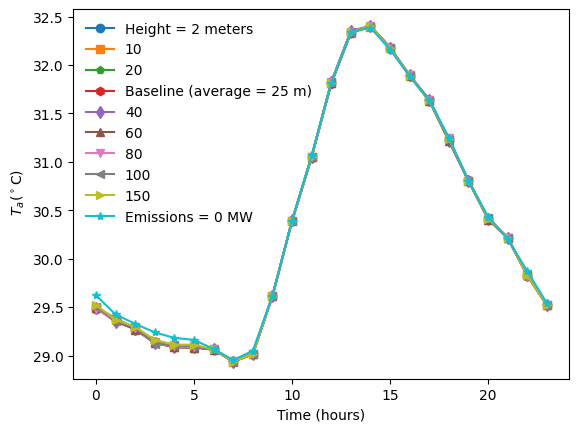

In [8]:
#Plot average temperature within SM for varying heights
data_bounds = [103.6, 1.17, 103.85, 1.35] # Old values
data_bounds = [103.6, 1.17, 103.85, 1.31] # New values
ji_bounds = [103.652229,1.219562,103.741493,1.291130] # JI
ex_bounds = [103.7,1.15,103.82, 1.24]

heights = list(range(20,120,20))
heights = [2,10] + heights + [150]
zero_label = ["Emissions = 0 MW"]
nz_labels = [str(x) for x in heights]
legend_labels= nz_labels + zero_label
legend_labels.insert(3,"Baseline (average = 25 m)")
legend_labels[0] = "Height = 2 meters"

# legend_labels = ["No emissions", "Baseline", "Height = 2 m", "Height = 150 m"]
# legend_labels = ["No emissions", "Baseline", "Modified Location"]
fig = ans.plot_ave_temp_runs(runs = [38, 48, 49, 37, *range(50,54), 39, 36], times = [*range(24)], data_bounds= data_bounds, 
                             exclude_bounds=[ji_bounds,ex_bounds],
                             legend_labels=legend_labels,
                             param = "Temperature")

8 0.251373291015625
8 0.5796394348144531
8 0.5472259521484375
6 0.7916469573974609
8 0.9243373870849609
6 1.0269279479980469
6 1.1042728424072266
6 1.24072265625
6 1.272613525390625


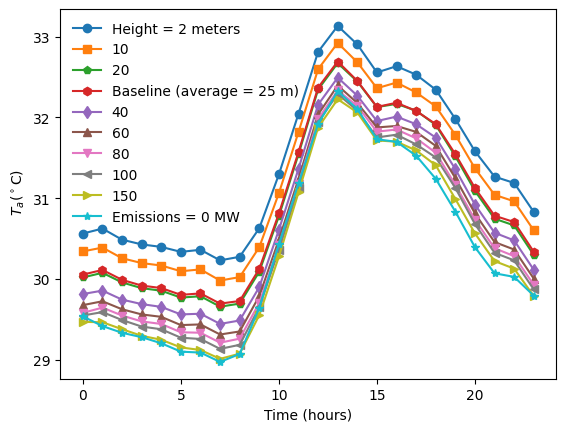

In [9]:
#Plot average temperature within JI for varying heights
data_bounds = [103.6, 1.17, 103.85, 1.35] # Old values
data_bounds = [103.6, 1.17, 103.85, 1.31] # New values
ji_bounds = [103.652229,1.219562,103.741493,1.291130] # JI
ex_bounds = [103.7,1.15,103.82, 1.24]

heights = list(range(20,120,20))
heights = [2,10] + heights + [150]
zero_label = ["Emissions = 0 MW"]
nz_labels = [str(x) for x in heights]
legend_labels= nz_labels + zero_label
legend_labels.insert(3,"Baseline (average = 25 m)")
legend_labels[0] = "Height = 2 meters"
# legend_labels = ["No emissions", "Baseline", "Height = 2 m", "Height = 150 m"]
# legend_labels = ["No emissions", "Baseline", "Modified Location"]
fig = ans.plot_ave_temp_runs(runs = [38, 48, 49, 37, *range(50,54), 39, 36], times = [*range(24)], data_bounds= ji_bounds, 
                             exclude_bounds=[],
                             legend_labels=legend_labels,
                             param = "Temperature")

0 0.11943435668945312
11 0.09494400024414062


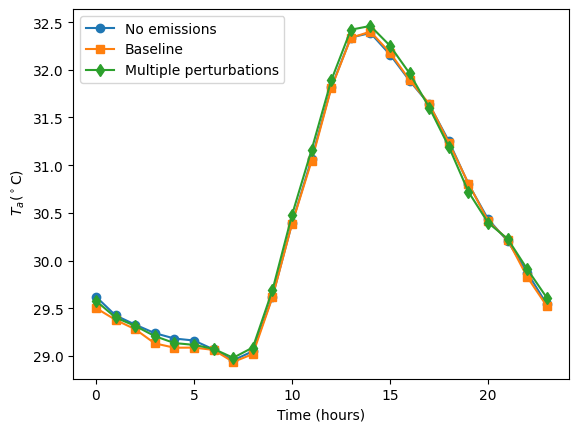

In [59]:
#Plot average temperature within SM for varying locations
data_bounds = [103.6, 1.17, 103.85, 1.35] # Old values
data_bounds = [103.6, 1.17, 103.85, 1.31] # New values
ji_bounds = [103.652229,1.219562,103.741493,1.291130] # JI
ex_bounds = [103.7,1.15,103.82, 1.24]
legend_labels = ["No emissions", "Baseline", "Multiple perturbations"]
fig = ans.plot_ave_temp_runs(runs = [36, 37, 47], times = [*range(24)], data_bounds= data_bounds, 
                             exclude_bounds=[ji_bounds,ex_bounds],
                             legend_labels=legend_labels,
                             param = "Temperature")

20 0.73272705078125
14 0.0780792236328125


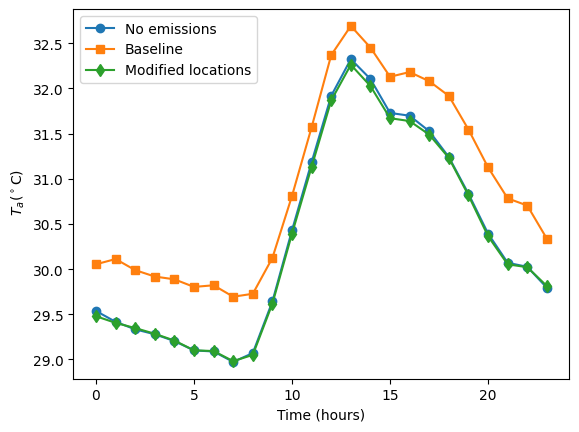

In [55]:
#Plot average temperature within JI for varying locations
data_bounds = [103.6, 1.17, 103.85, 1.35] # Old values
data_bounds = [103.6, 1.17, 103.85, 1.31] # New values
ji_bounds = [103.652229,1.219562,103.741493,1.291130] # JI
ex_bounds = [103.7,1.15,103.82, 1.24]
legend_labels = ["No emissions", "Baseline", "Modified locations"]
fig = ans.plot_ave_temp_runs(runs = [36, 37, 43], times = [*range(24)], data_bounds= ji_bounds, 
                             exclude_bounds=[],
                             legend_labels=legend_labels,
                             param = "Temperature")

Minimum temperature =  28.21457
Maximum temperature =  32.579163


c:\Users\KNAG01\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Figure size 640x480 with 0 Axes>

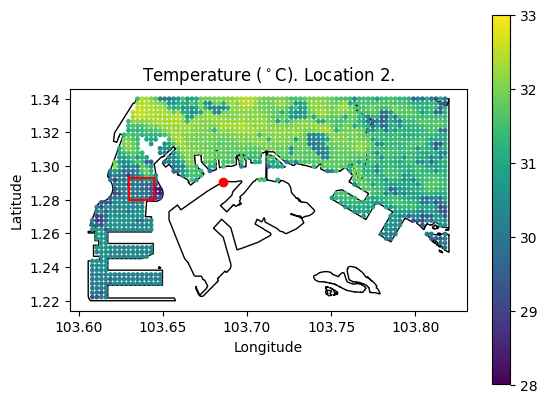

In [4]:
# Plot temperature distribution in JI and the surrounding region
ji_bounds = [103.652229,1.219562,103.741493,1.291130] # JI
ex_bounds = [103.7,1.15,103.82, 1.24]
data_bounds = [103,1.0,105,2.0]
data_bounds = [103.6, 1.22, 103.82, 1.34] # JI and SM
# data_bounds = [103.65, 1.22, 103.80, 1.36] # JI and SM
# Regions of interest
regions_bounds = [[103.630,1.28,103.645,1.293],[103.665,1.31,103.68,1.323],[103.70,1.31,103.714,1.323],
[103.735,1.305,103.75,1.318],[103.765,1.29,103.78,1.303]]
region_ind = 0
lon1 = 103.6552
lat1 = 1.266087
lon2 = 103.7083
lat2 = 1.292299
lon3 = 103.68585251887791
lat3 = 1.2903344949022661
lon4 = 103.73729603168897
lat4 = 1.2746195811369614
fig = ans.plot_temp_spatial(run = 60, hour = 19, data_bounds=data_bounds,exclude_bounds=[ji_bounds, ex_bounds],
regions_bounds = [regions_bounds[region_ind]], regions_labels=["" ], locations_lon = [lon3], locations_lat = [lat3], vmin=28, vmax=33, markersize = 6, 
param = "Temperature", title= "Location 2.")


8 0.7766189575195312
8 1.2827644348144531
8 1.048696517944336


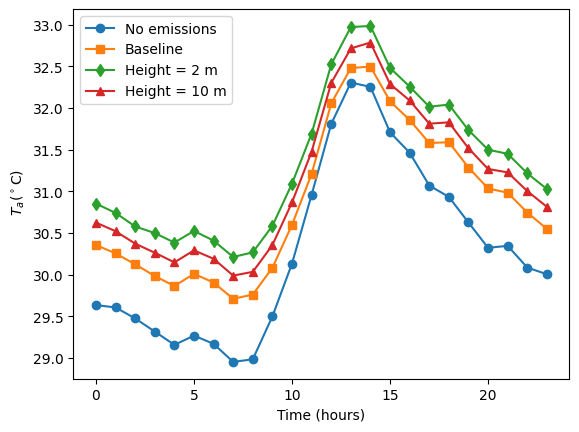

In [6]:
# Plot average temperature within JI

ji_bounds = [103.652229,1.219562,103.741493,1.291130] # JI
ex_bounds = [103.7,1.15,103.82, 1.24]
legend_labels = ["No emissions", "Including emissions"]
# legend_labels = ["No emissions", "Baseline", "Reduced emissions", "Increased Emissions"]
legend_labels = ["No emissions", "Baseline", "Height = 2 m", "Height = 10 m"]
# legend_labels = ["No emissions", "Baseline", "Modified location"]

fig = ans.plot_ave_temp_runs(runs = [29, 30, 31, 32], times = [*range(24)], data_bounds= ji_bounds, 
                             exclude_bounds=[],
                             legend_labels=legend_labels,
                             param = "Temperature")

0 ,  -1.3048057556152344 ,  20 ,  0.27617835998535156
0 ,  -0.6788482666015625 ,  17 ,  0.6552314758300781
21 ,  -0.14127349853515625 ,  15 ,  0.21363067626953125
15 ,  -0.08145713806152344 ,  11 ,  0.48425865173339844
10 ,  -0.24739456176757812 ,  14 ,  0.22236251831054688


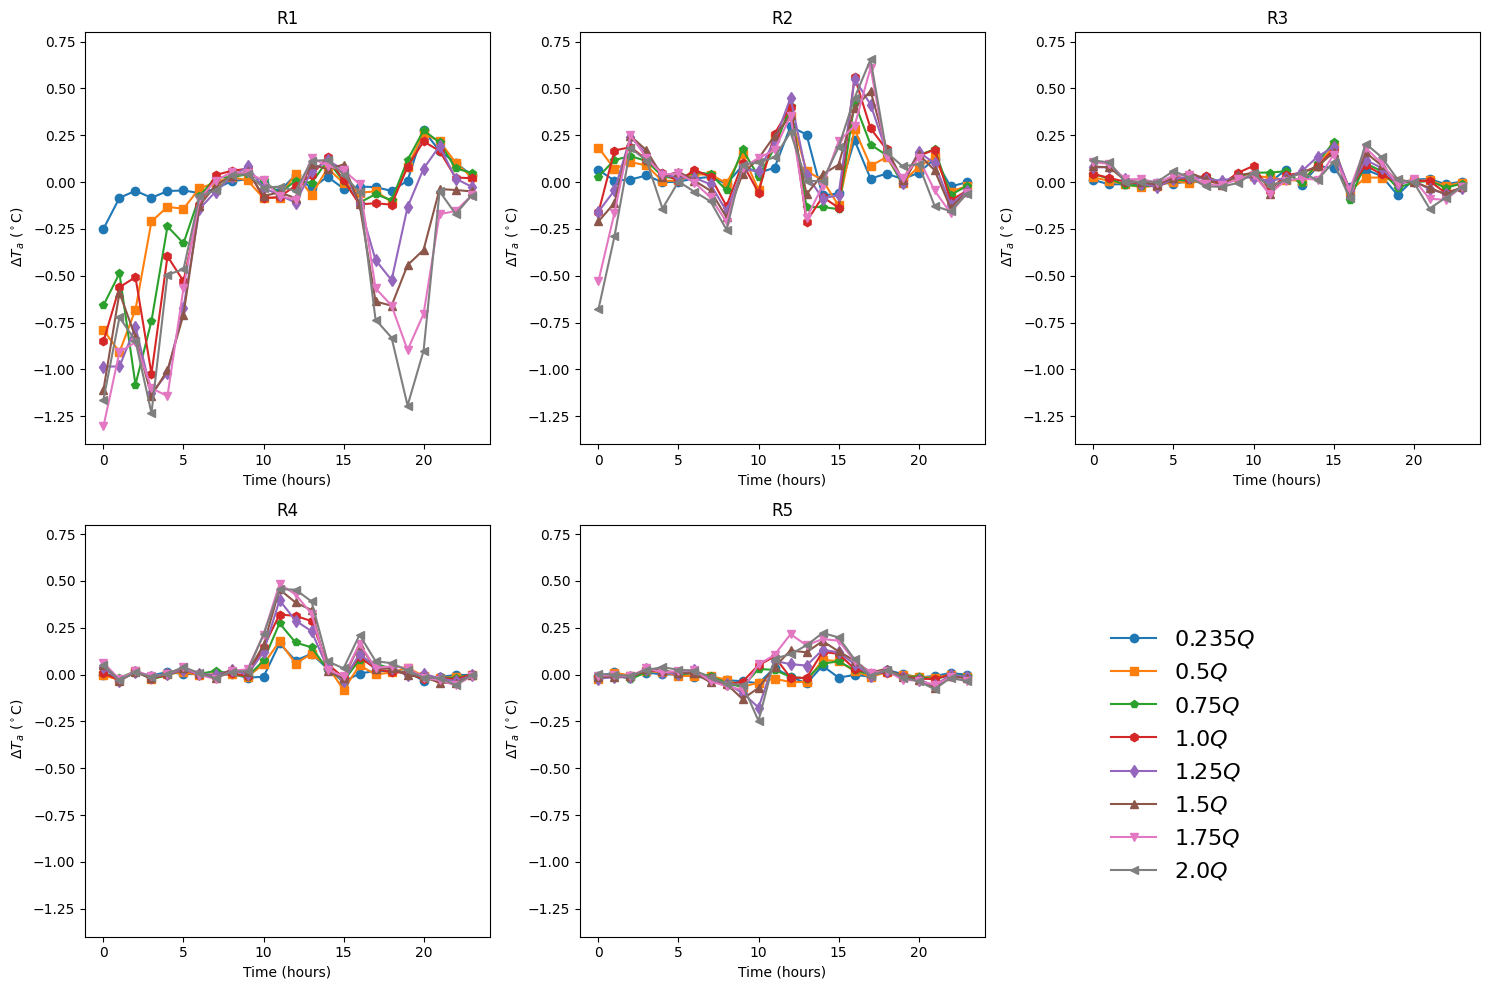

In [2]:
#Plot average temperature within selected regions of SM for varying emissions

frac = np.arange(0.5,2.25,0.25)
frac = np.insert(frac,0,0.235)
# frac = np.append(frac,2.35)
nz_labels = [str(x) + "$Q$" for x in frac]
legend_labels= nz_labels


regions_bounds = [[103.630,1.28,103.645,1.293],[103.665,1.31,103.68,1.323],[103.70,1.31,103.714,1.323],
[103.735,1.305,103.75,1.318],[103.765,1.29,103.78,1.303]]

fig = ans.plot_ave_regions(runs = [36, 40, 54, 55, 37, *range(56,60)], times = [*range(24)], 
                    regions_bounds= regions_bounds,ylim = (-1.4, 0.8), legend_labels=legend_labels)

3 ,  -1.0641212463378906 ,  20 ,  0.236663818359375
13 ,  -0.3373603820800781 ,  16 ,  0.5629196166992188
16 ,  -0.06832122802734375 ,  15 ,  0.23982620239257812
15 ,  -0.0787811279296875 ,  11 ,  0.4273529052734375
9 ,  -0.141387939453125 ,  11 ,  0.1425304412841797


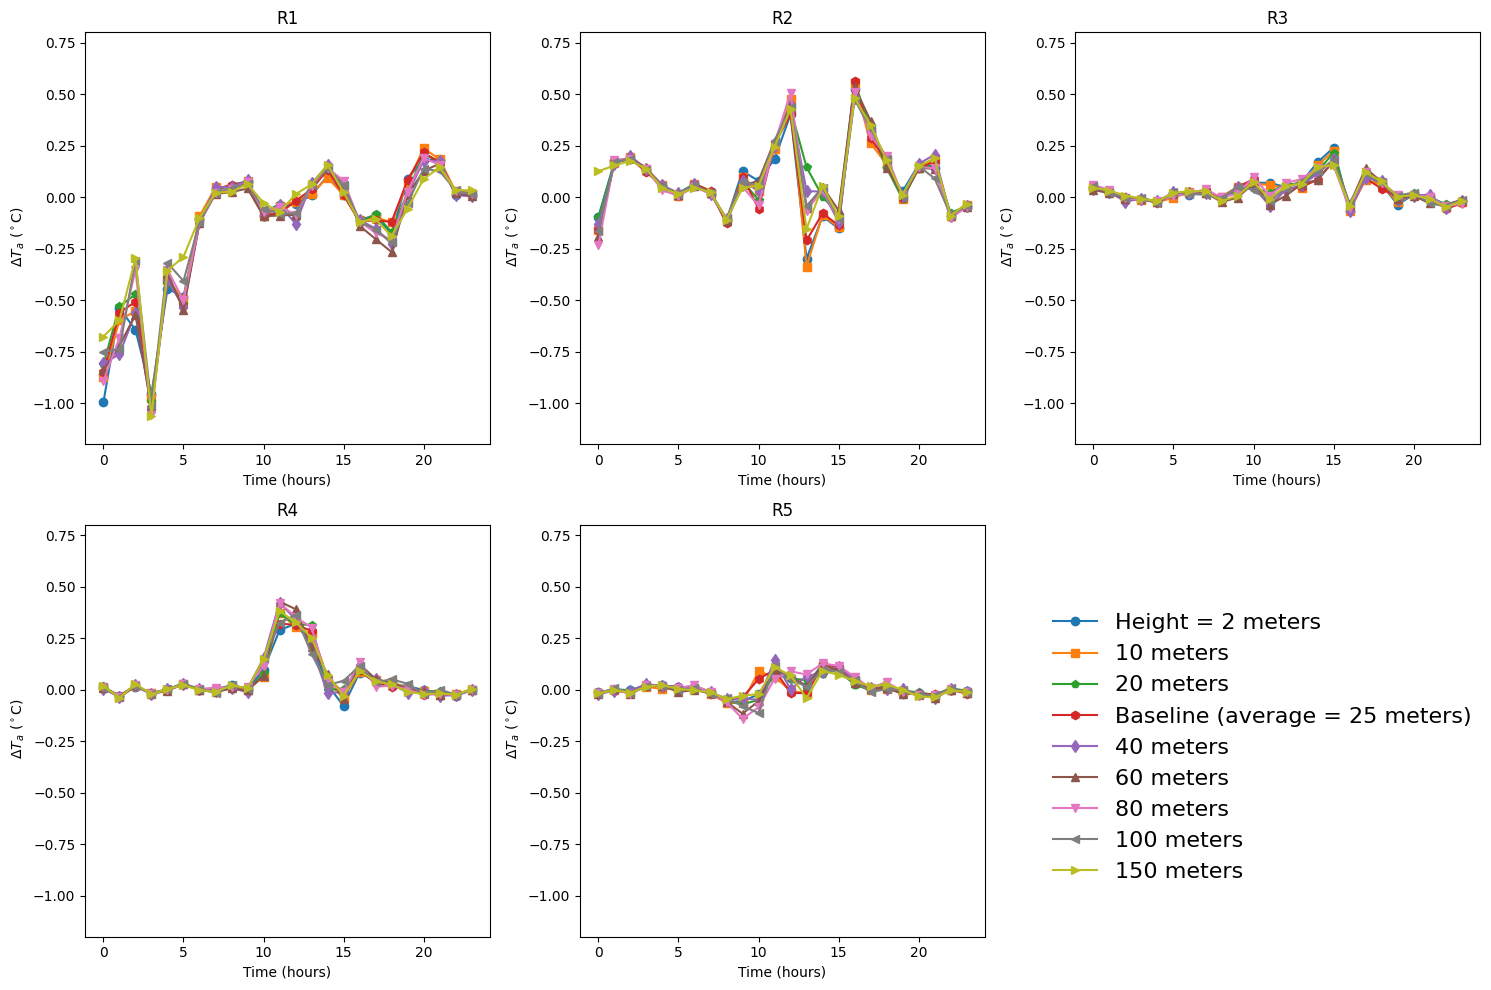

In [2]:
#Plot average temperature within selected regions of SM for varying heights


heights = list(range(20,120,20))
heights = [2,10] + heights + [150]
legend_labels = [str(x) + " meters" for x in heights]
legend_labels.insert(3,"Baseline (average = 25 meters)")
legend_labels[0] = "Height = 2 meters"
regions_bounds = [[103.630,1.28,103.645,1.293],[103.665,1.31,103.68,1.323],[103.70,1.31,103.714,1.323],
[103.735,1.305,103.75,1.318],[103.765,1.29,103.78,1.303]]

fig = ans.plot_ave_regions(runs = [36, 38, 48, 49, 37, *range(50,54), 39], times = [*range(24)],
ylim = (-1.2, 0.8), 
regions_bounds= regions_bounds, legend_labels=legend_labels)

19 ,  -1.5454559326171875 ,  13 ,  0.3198280334472656
8 ,  -0.6405982971191406 ,  16 ,  0.5629196166992188
1 ,  -0.7178077697753906 ,  17 ,  0.590606689453125
14 ,  -0.11093902587890625 ,  13 ,  0.4923095703125
9 ,  -0.1366424560546875 ,  14 ,  0.2502784729003906


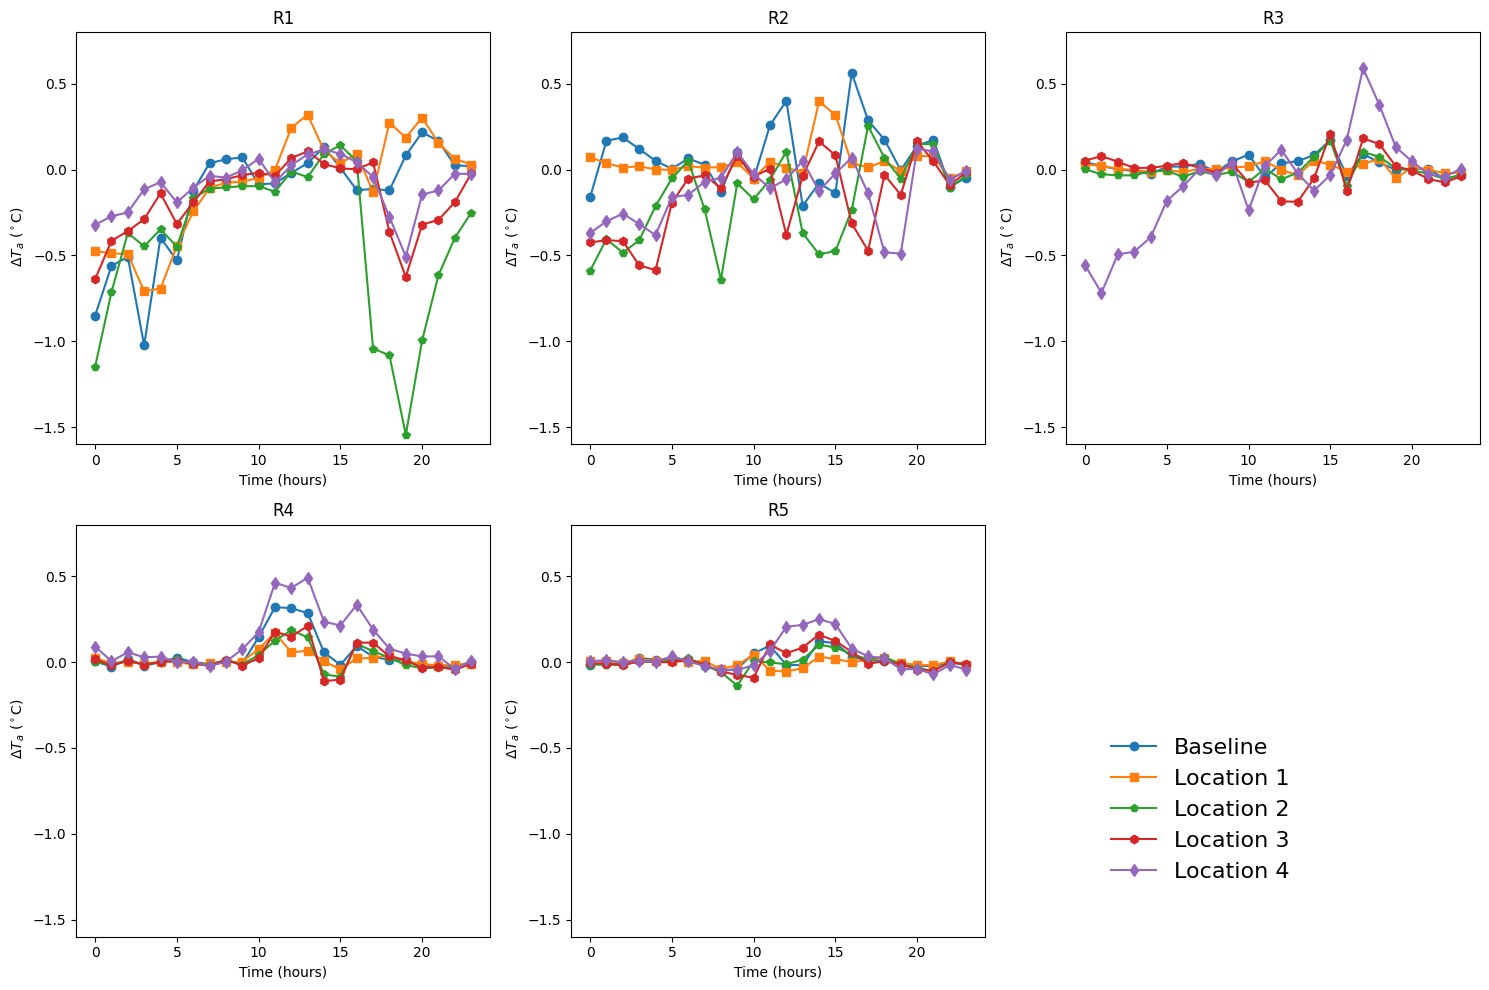

In [14]:
# Plot average temperature within selected regions of SM for modified locations

legend_labels = ["Location " + str(i + 1) for i in range(4)]
legend_labels.insert(0,"Baseline")

regions_bounds = [[103.630,1.28,103.645,1.293],[103.665,1.31,103.68,1.323],[103.70,1.31,103.714,1.323],
[103.735,1.305,103.75,1.318],[103.765,1.29,103.78,1.303]]

fig = ans.plot_ave_regions(runs = [36, 37, 42, 60, 43, 61], times = [*range(24)],
ylim = (-1.6, 0.8), 
regions_bounds= regions_bounds, legend_labels=legend_labels)

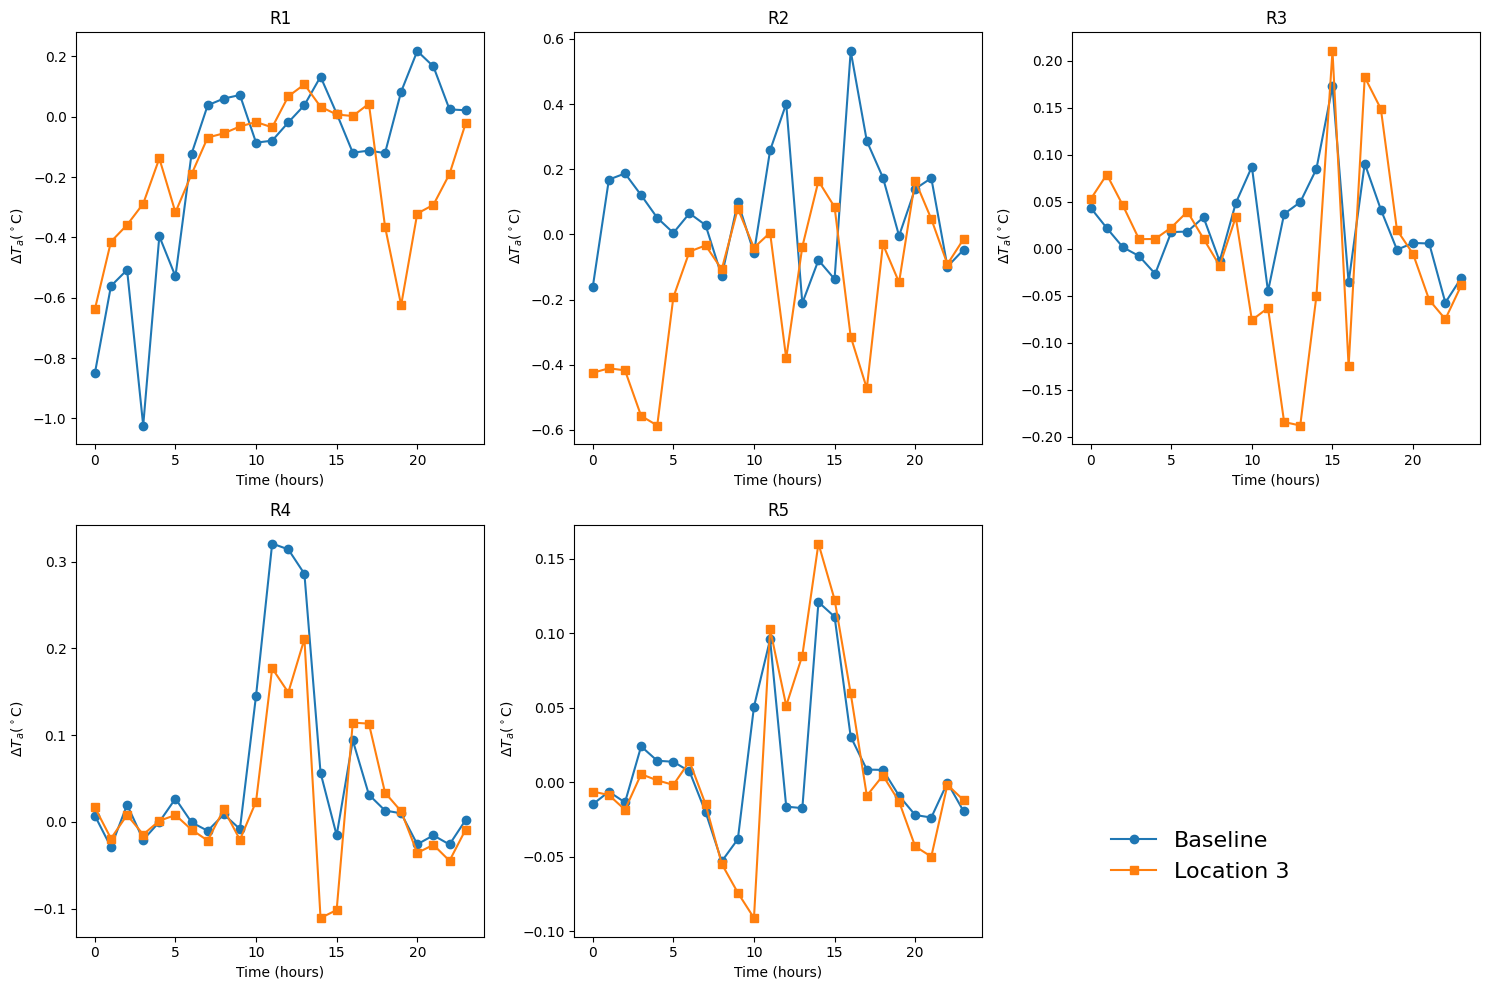

In [2]:
# Plot average temperature within selected regions of SM for multiple simultaneous perturbations

legend_labels = ["Location " + str(3) ]
legend_labels.insert(0,"Baseline")

regions_bounds = [[103.630,1.28,103.645,1.293],[103.665,1.31,103.68,1.323],[103.70,1.31,103.714,1.323],
[103.735,1.305,103.75,1.318],[103.765,1.29,103.78,1.303]]

fig = ans.plot_ave_regions(runs = [36, 37, 43], times = [*range(24)], regions_bounds= regions_bounds, legend_labels=legend_labels)

0.036494274
4.816389


<Figure size 640x480 with 0 Axes>

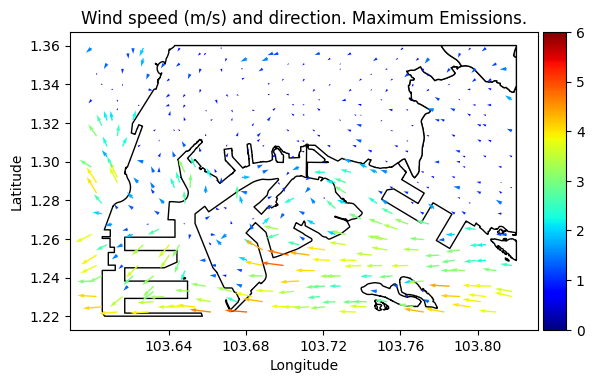

In [4]:
data_bounds = [103,1.0,105,2.0] # Whole simulation domain
data_bounds = [103.6, 1.22, 103.82, 1.36] # JI and SM
fig = ans.plot_wind_data(run = 41, hour = 0, data_bounds=data_bounds,vmin = 0, vmax = 6.0,scale= 100, freq = 10, title= "Maximum Emissions.")

1116


<Figure size 640x480 with 0 Axes>

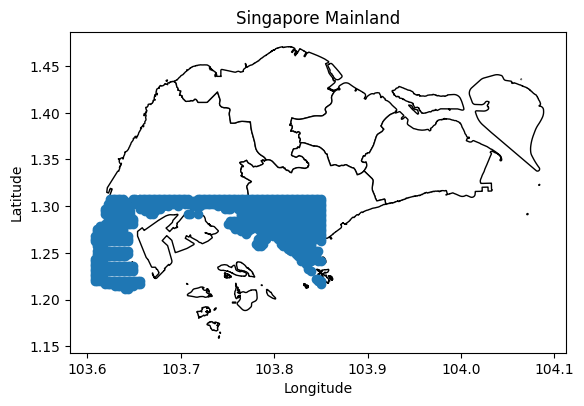

In [2]:
# Show locations of grid cells over which averaging is performed.
ji_bounds = [103.652229,1.219562,103.741493,1.291130] # JI
ex_bounds = [103.7,1.15,103.82, 1.24]
data_bounds = [103.6, 1.17, 103.85, 1.35] # Old values
data_bounds = [103.6, 1.17, 103.85, 1.31] # New values

fig = ans.plot_ave_region(data_bounds,exclude_bounds=[ji_bounds, ex_bounds], title = "Singapore Mainland")
# fig = ans.plot_ave_region(ji_bounds,exclude_bounds=[ex_bounds], title = "Jurong Island")

[25, 25, 25, 25, 25]


<Figure size 640x480 with 0 Axes>

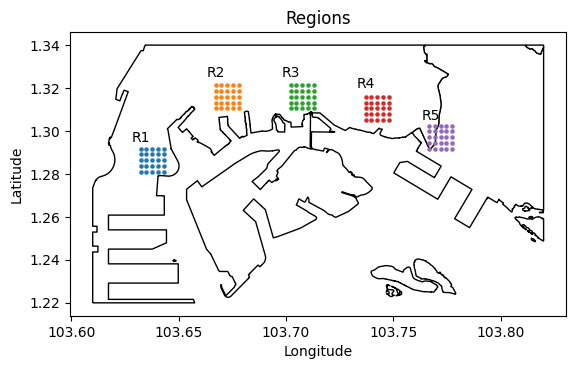

In [2]:
# Show locations of multiple small regions over which averaging is performed.
ji_bounds = [103.652229,1.219562,103.741493,1.291130] # JI
ex_bounds = [103.7,1.15,103.82, 1.24]
data_bounds = [103.61, 1.22, 103.82, 1.34] # JI and SM
regions_bounds = [[103.630,1.28,103.645,1.293],[103.665,1.31,103.68,1.323],[103.70,1.31,103.714,1.323],
[103.735,1.305,103.75,1.318],[103.765,1.29,103.78,1.303]]

# from matplotlib.widgets import Cursor
# %matplotlib widget

fig = ans.plot_multiple_regions(data_bounds=data_bounds, regions_bounds=regions_bounds, title = "Regions")
# ax = fig.axes[0]
# cursor = Cursor(ax, useblit=True, color='red', linewidth=2)
# fig = ans.plot_ave_region(ji_bounds,exclude_bounds=[ex_bounds], title = "Jurong Island")

In [2]:
# Get error calculated based on all grid cells in each region instead of just the centre grid cell
regions_bounds = [[103.630,1.28,103.645,1.293],[103.665,1.31,103.68,1.323],[103.70,1.31,103.714,1.323],
[103.735,1.305,103.75,1.318],[103.765,1.29,103.78,1.303]]
error = ans.get_error_regions(regions_bounds)
print(error)

[[2.30334213 2.36328982 2.3925367  2.43173507 2.30234154]
 [2.50568383 2.5370086  2.56951837 2.60184356 2.5192876 ]]


In [ ]:
# Get coordinates of all grid cells within specified regions

regions_bounds = [[103.630,1.28,103.645,1.293],[103.665,1.31,103.68,1.323],[103.70,1.31,103.714,1.323],
[103.735,1.305,103.75,1.318],[103.765,1.29,103.78,1.303]]

coords = ans.get_region_coords(regions_bounds = regions_bounds)
print(coords)

In [4]:
# Get mean absolute error and root mean sqaure error for the temperature at the middle grid cell of each region defined in
# in the previous code cell

regions_bounds = [[103.630,1.28,103.645,1.293],[103.665,1.31,103.68,1.323],[103.70,1.31,103.714,1.323],
[103.735,1.305,103.75,1.318],[103.765,1.29,103.78,1.303]]

error = ans.get_error(regions_bounds=regions_bounds)
print(error)


[[2.22101212 2.73863983 2.95362829 1.27733002 2.28130163]
 [2.31924733 2.93577369 3.03115227 1.6482609  2.40995756]]


In [2]:
# Get coordinates of middle grid cells for each region in the previous code segment
regions_bounds = [[103.630,1.28,103.645,1.293],[103.665,1.31,103.68,1.323],[103.70,1.31,103.714,1.323],
[103.735,1.305,103.75,1.318],[103.765,1.29,103.78,1.303]]

midpoints = ans.get_mid_regions_coords(regions_bounds)
for point in midpoints:
    print(point)

[103.63770196097238, 1.2864011720169422]
[103.67262257167272, 1.315853059753891]
[103.70754318237304, 1.315853059753891]
[103.74246379307338, 1.3104981710744459]
[103.77201200212751, 1.2971109493758326]


In [2]:
# Get indices of middle grid cells in the dataframe returned by the get_temp_uhi function for each region in the previous code segment
regions_bounds = [[103.630,1.28,103.645,1.293],[103.665,1.31,103.68,1.323],[103.70,1.31,103.714,1.323],
[103.735,1.305,103.75,1.318],[103.765,1.29,103.78,1.303]]

indices = ans.get_mid_regions_indices(regions_bounds)
for index in indices:
    print(index)

19143
16846
16859
17292
18353


Minimum heat flux (W/m^2) =  0
Maximum heat flux (W/m^2) =  30819


c:\Users\KNAG01\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Figure size 640x480 with 0 Axes>

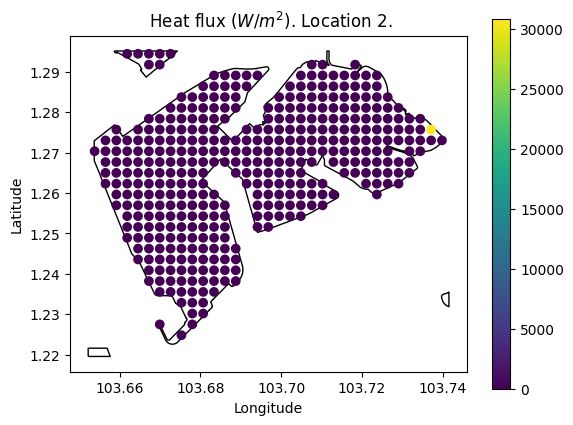

In [3]:
# Check spatial distribution of heat flux for a particular run and time
# from matplotlib.widgets import Cursor
# %matplotlib widget
ji_bounds = [103.652229,1.219562,103.741493,1.295130] # JI
fig = ans.plot_heat_spatial(run = 61, hour = 0, layer = 0, data_bounds=ji_bounds,exclude_bounds=[],
                            vmin=None,vmax=None, title= "Location 2.")
# ax = fig.axes[0]
# cursor = Cursor(ax, useblit=True, color='red', linewidth=2)

In [9]:
# Get total heat emissions for a particular run and hour
ji_bounds = [103.652229,1.219562,103.741493,1.295130] # JI
total_heat = ans.get_total_heat(run = 37, hour = 1, min_layer = 0, max_layer = 7, data_bounds = ji_bounds)
print(total_heat)

23073390000.0


<Figure size 640x480 with 0 Axes>

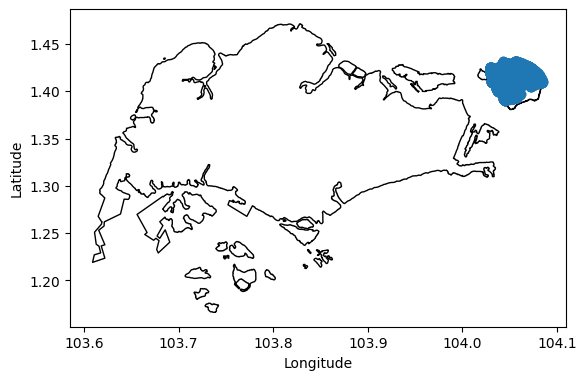

In [2]:
# Show locations of grid cells classified as rural for the purpose of calculating UHI
fig = ans.plot_rural_loc()

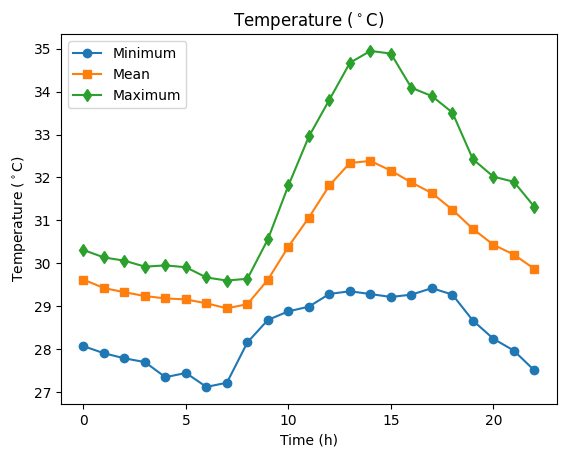

In [3]:
# Check min and max values in region of interest
data_bounds = [103.6, 1.17, 103.85, 1.31] # New values
ji_bounds = [103.652229,1.219562,103.741493,1.291130] # JI
ex_bounds = [103.7,1.15,103.82, 1.24]
fig = ans.plot_temp_time(run = 36, times = [*range(23)], data_bounds=data_bounds,exclude_bounds = [ji_bounds,ex_bounds], param= "Temperature")

In [3]:
ans.rename_timestamps(17)